# Credit Card Fraud Detection

## Context
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Problem Statement
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


## Data

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

## Solution

### Libraries

In [23]:
# standard libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# EDA and preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Model libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Flatten, Conv1D
from tensorflow.keras.optimizers import Adam

### Load Data

In [30]:
card_data = pd.read_csv('Datasets/creditdata/creditcard.csv')
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EDA and preprocessing

In [31]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
card_data.shape

(284807, 31)

In [33]:
# find the type of class exists

card_data.Class.unique()

array([0, 1], dtype=int64)

In [34]:
# Find the number of elements in each class

card_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**The distribution of class is uneven**

In [35]:
notfraud = card_data[card_data.Class == 0]
fraud = card_data[card_data.Class == 1]

**Extract random entries of not fraud class**

In [36]:
notfraud = notfraud.sample(738)

In [37]:
# create a new data frame

random_card_data = fraud.append(notfraud, ignore_index= True)
random_card_data.shape

(1230, 31)

In [38]:
X = random_card_data.drop(['Class'], axis =1)
y = random_card_data['Class']

In [39]:
# Split data into training and testing set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify =  y)
X_train.shape, X_test.shape

((984, 30), (246, 30))

**Applying StandardScaler to obtain all the features in similar range**

In [40]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [41]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [54]:
X_train.shape[1]

30

**Reshape data into 3D**

In [42]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### CNN Model 

In [43]:
model = Sequential()
model.add(Conv1D(32,2, activation = "relu", input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation = "relu" ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation ="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation ="sigmoid"))


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [45]:
# Compiling and Fiting

model.compile(optimizer=Adam(learning_rate = 0.0001), loss= "binary_crossentropy",metrics= ["accuracy"])


In [46]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Train on 984 samples, validate on 246 samples
Epoch 1/20
984/984 [==============================] - 4s 4ms/sample - loss: 0.5851 - accuracy: 0.7297 - val_loss: 0.5860 - val_accuracy: 0.8537
Epoch 2/20
984/984 [==============================] - 0s 435us/sample - loss: 0.3845 - accuracy: 0.8618 - val_loss: 0.5086 - val_accuracy: 0.8415
Epoch 3/20
984/984 [==============================] - 0s 265us/sample - loss: 0.3028 - accuracy: 0.8994 - val_loss: 0.4531 - val_accuracy: 0.8496
Epoch 4/20
984/984 [==============================] - 0s 266us/sample - loss: 0.2465 - accuracy: 0.9177 - val_loss: 0.4032 - val_accuracy: 0.8618
Epoch 5/20
984/984 [==============================] - 0s 267us/sample - loss: 0.2668 - accuracy: 0.9136 - val_loss: 0.3565 - val_accuracy: 0.8618
Epoch 6/20
984/984 [==============================] - 0s 263us/sample - loss: 0.2520 - accuracy: 0.9167 - val_loss: 0.3146 - val_accuracy: 0.8902
Epoch 7/20
984/984 [==============================] - 0s 265us/sample - loss: 0.

In [48]:
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

    plt.plot(epochRange,history.history['loss'])
    plt.plot(epochRange,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

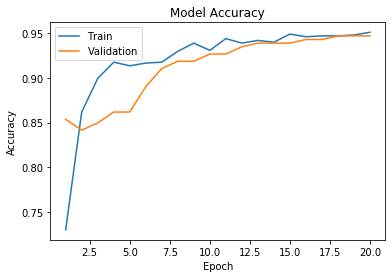

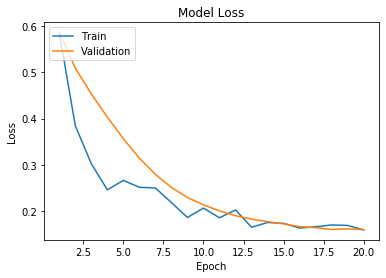

In [49]:
plotLearningCurve(history,20)